In [1]:
#!pip install cufflinks

In [2]:
#!pip install chart_studio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import iplot, plot
import cufflinks as cf
import seaborn as sns

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
%matplotlib inline

In [5]:
df = pd.read_excel("Data_Train.xlsx")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#!pip install pandas-profiling

In [8]:
import pandas_profiling as pf

# Automated EDA

In [9]:
df.columns = df.columns.str.strip()

In [10]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Manuel EDA

In [11]:
df.shape

(10683, 11)

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.dropna(how = 'any' ,inplace = True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

<ipython-input-16-d36ab487f589>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [18]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

# Dep_TIME

In [19]:
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [20]:
df.drop(['Dep_Time'],axis =1,inplace = True)

# Arrival Time

In [21]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [22]:
df.drop(['Arrival_Time'],axis = 1,inplace = True)

# Duration Time

In [23]:
duration = df['Duration'].str.split(' ',expand = True)
duration[1].fillna('00m',inplace = True) #Filling 00minutes to all values which only has hours
df['duration_hr'] = duration[0].apply(lambda x: x[:-1])
df['duration_min'] = duration[1].apply(lambda x: x[:-1])

In [24]:
df.drop(['Duration'],axis = 1,inplace = True)

In [25]:
cf.set_config_file(theme = 'ggplot' , sharing = 'public' ,offline = True)

# Count of Airlines

In [26]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Airline vs Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

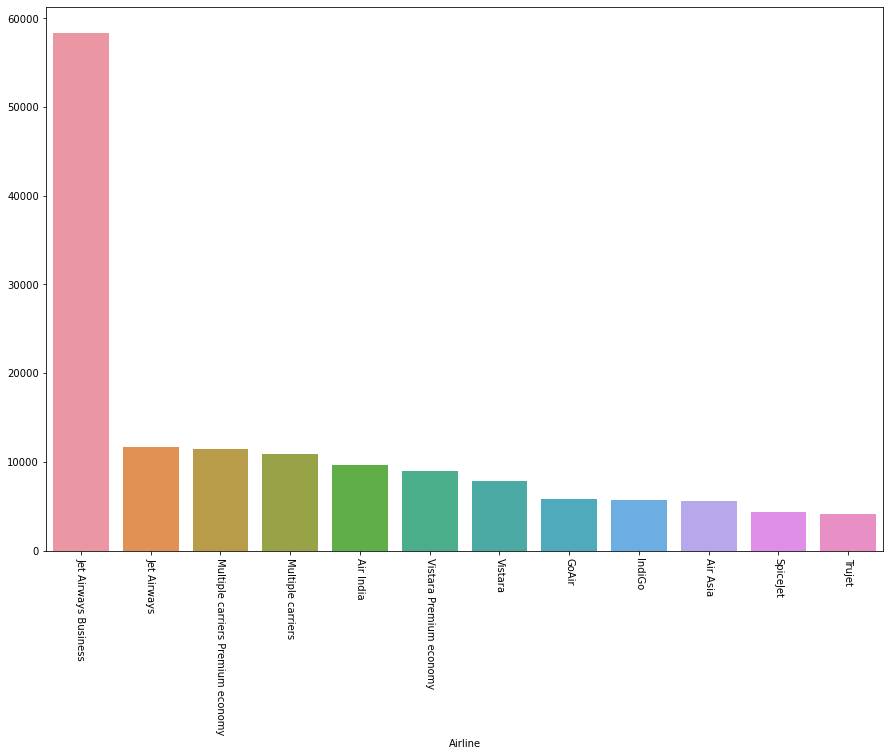

In [27]:
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending =False)
plt.figure(figsize = (15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation = 270)

<function matplotlib.pyplot.show(*args, **kw)>

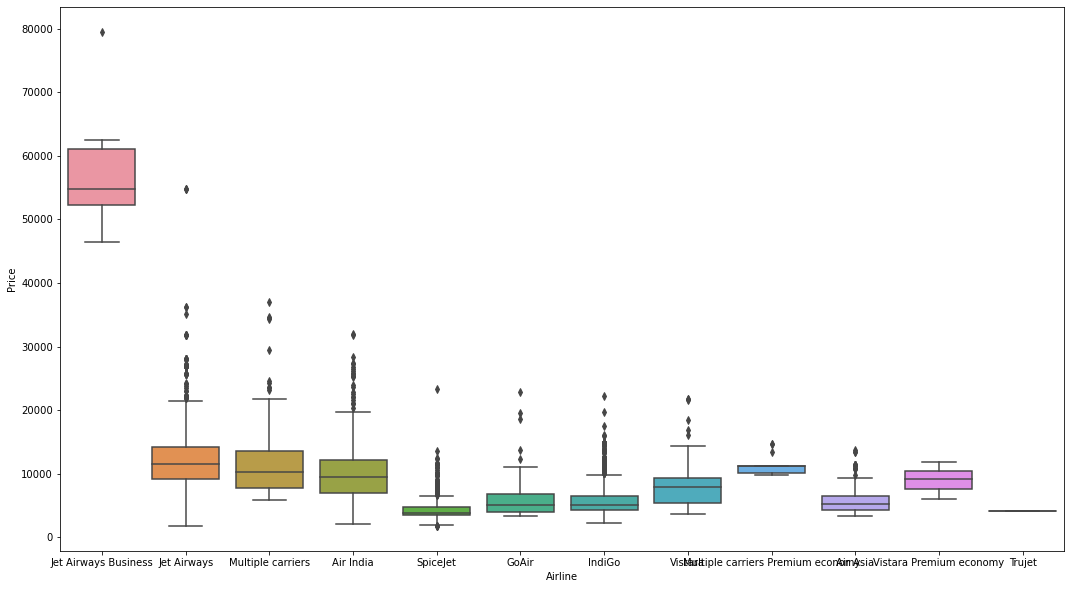

In [28]:
plt.figure(figsize = (18,10))
sns.boxplot(y = 'Price' , x ='Airline' , data = df.sort_values('Price',ascending =False))
plt.show

# Price Based on number of stops

In [29]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

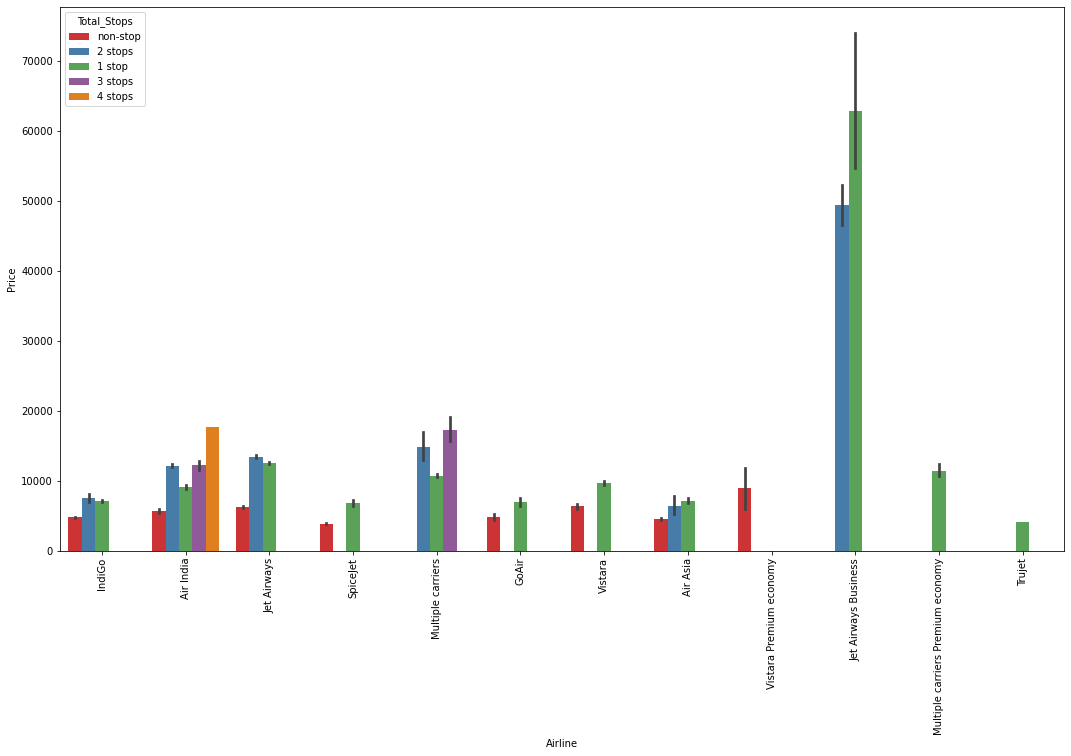

In [30]:
plt.figure(figsize =(18,10))
ax = sns.barplot(x = df['Airline'] , y=df['Price'],hue = df['Total_Stops'],palette = "Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [31]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source vs Price

<function matplotlib.pyplot.show(*args, **kw)>

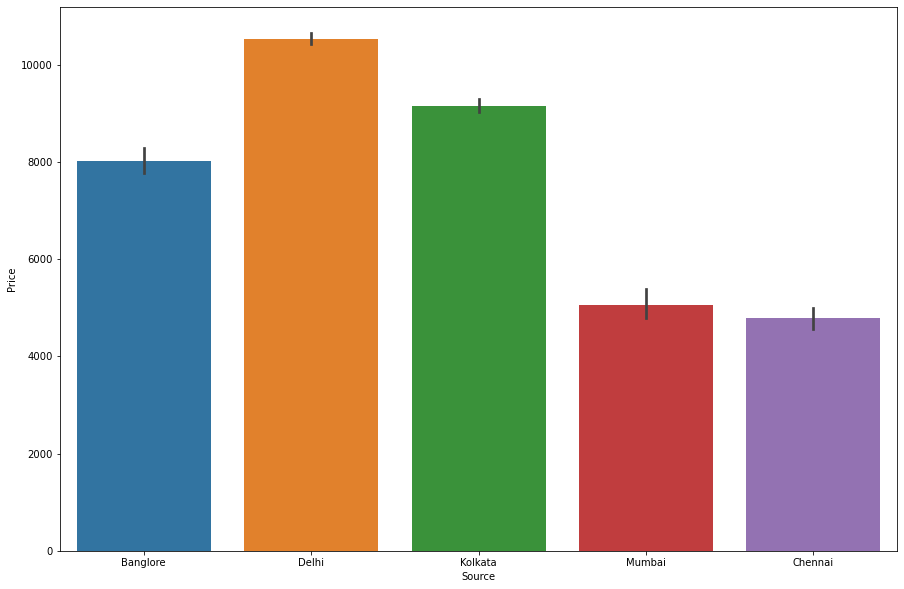

In [32]:
plt.figure(figsize =(15,10))
sns.barplot(y = 'Price' , x = 'Source' , data = df.sort_values('Price', ascending=False))
plt.show

# Destination vs Price

<function matplotlib.pyplot.show(*args, **kw)>

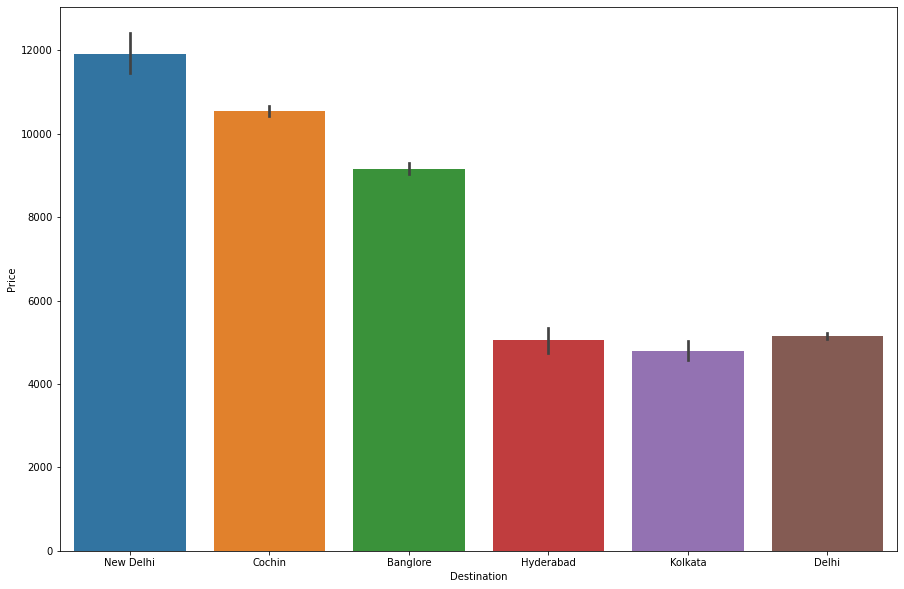

In [33]:
plt.figure(figsize =(15,10))
sns.barplot(y = 'Price' , x = 'Destination' , data = df.sort_values('Price', ascending=False))
plt.show

In [34]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
for i in df:
    df.replace('New Delhi' , 'Delhi' , inplace = True)
    

In [36]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

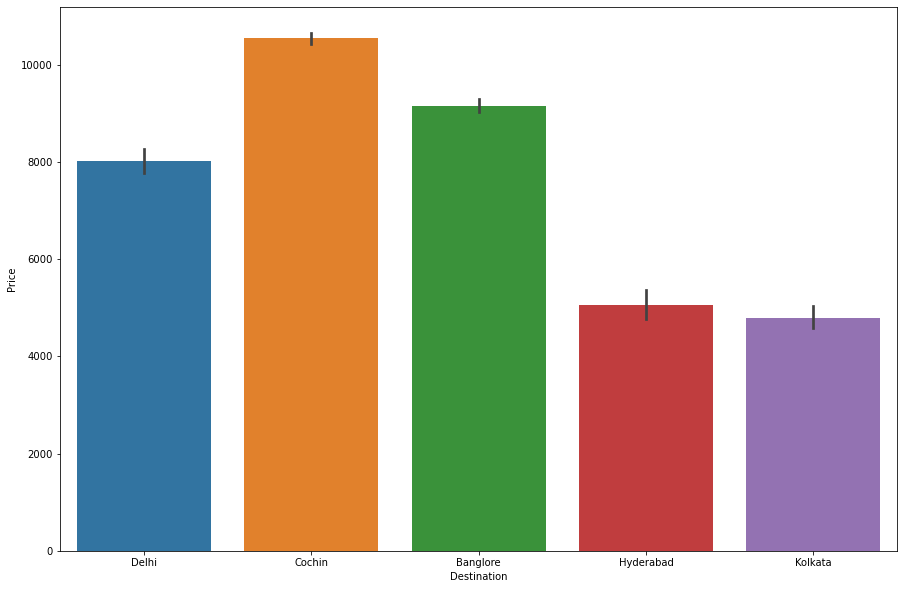

In [38]:
plt.figure(figsize =(15,10))
sns.barplot(y = 'Price' , x = 'Destination' , data = df.sort_values('Price', ascending=False))
plt.show

<ipython-input-39-a838df0490d4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



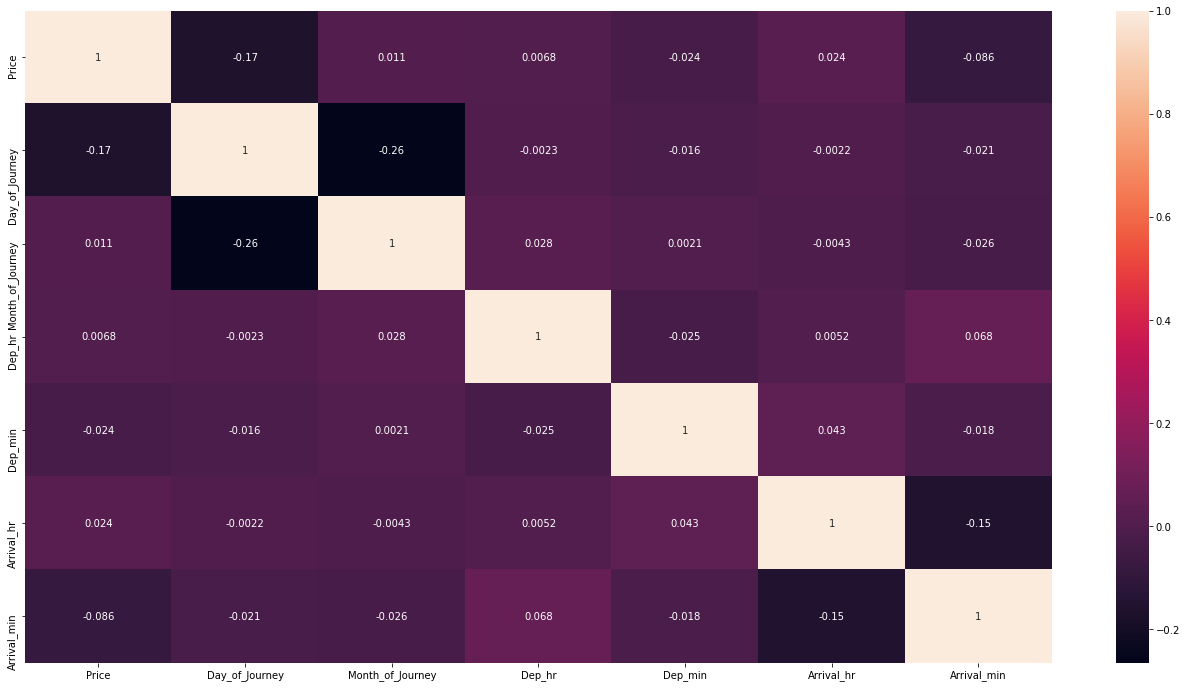

In [39]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

# Apply Onehot Encoding on the categorical variables

In [40]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'2 stops':2,'3 stops':3,'1 stop':1,'4 stops':4 })
air_dummy = pd.get_dummies(df['Airline'],drop_first = True)

source_dest_dummy = pd.get_dummies(df[['Source','Destination']],drop_first=True)
df = pd.concat([air_dummy,source_dest_dummy,df],axis = 1)

In [41]:
df.drop(['Airline','Source','Destination'],inplace =True,axis =1)

In [42]:
df.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00


# Test Data

In [43]:
df_test = pd.read_excel("Test_set.xlsx")

In [44]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Lets Perform the same steps as we did for train data earlier

In [45]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey'] = (df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey'] = (df_test['Date_of_Journey']).dt.month

#Dep_Time
df_test['Dep_hr'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_Time
df_test['Arrival_hr'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration time
duration = df_test['Duration'].str.split(' ',expand = True)
duration[1].fillna('00m',inplace = True) 
df_test['duration_hr'] = duration[0].apply(lambda x: x[:-1])
df_test['duration_min'] = duration[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace = True,axis = 1)

#Handling the data
df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop':0,'2 stops':2,'3 stops':3,'1 stop':1,'4 stops':4 })

air_dummy = pd.get_dummies(df_test['Airline'],drop_first = True)
source_dest_dummy = pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test = pd.concat([air_dummy,source_dest_dummy,df_test],axis = 1)

<ipython-input-45-3ddcd1ed4698>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [46]:
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,0,1,0,0,0,0,0,0,...,1,No info,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,1,No info,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,1,No info,21,5,8,0,21,0,13,00
4,0,0,0,0,0,0,0,0,0,0,...,0,No info,24,6,23,55,2,45,2,50


In [47]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route'],inplace =True,axis = 1)

In [48]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [49]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [50]:
x = df.drop(['Route','Price','Additional_Info'],axis = 1)
y = df['Price']

In [51]:
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,0,1,3,1,16,50,21,35,4,45


# Model Building and Hyperparameter Tuning

### ExtraTreesRegressor 

In [52]:
df.dtypes

Air India                             uint8
GoAir                                 uint8
IndiGo                                uint8
Jet Airways                           uint8
Jet Airways Business                  uint8
Multiple carriers                     uint8
Multiple carriers Premium economy     uint8
SpiceJet                              uint8
Trujet                                uint8
Vistara                               uint8
Vistara Premium economy               uint8
Source_Chennai                        uint8
Source_Delhi                          uint8
Source_Kolkata                        uint8
Source_Mumbai                         uint8
Destination_Cochin                    uint8
Destination_Delhi                     uint8
Destination_Hyderabad                 uint8
Destination_Kolkata                   uint8
Route                                object
Total_Stops                           int64
Additional_Info                      object
Price                           

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators = 120)
et_model.fit(x , y)
y_predict = et_model.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9643175429545522

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_predict = rf_model.predict(x_test)
r2_score(y_test,y_predict)

0.7975731166340088

# Hyperparameter

In [58]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80,stop = 1500, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num = 5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

rand_grid = {'n_estimators':n_estimators,
            'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [59]:
rCV.fit(x_train,y_train)

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

C:\Users\ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [60]:
rf_pred = rCV.predict(x_test)
rf_pred

array([12512.26985677,  4286.64118629,  6152.84958257, ...,
       11665.04891156,  9751.8819487 ,  8657.95930279])

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.2815554314675
MSE 3971237.5737231164


In [64]:
r2_score(y_test,rf_pred)

0.8065987948875258

In [65]:
#!pip install catboost

In [66]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 136ms	remaining: 2m 15s
1:	learn: 4317.7245126	total: 138ms	remaining: 1m 9s
2:	learn: 4167.9871081	total: 141ms	remaining: 46.9s
3:	learn: 4030.4839609	total: 144ms	remaining: 35.9s
4:	learn: 3906.4844760	total: 147ms	remaining: 29.2s
5:	learn: 3785.4580402	total: 149ms	remaining: 24.7s
6:	learn: 3673.8662552	total: 151ms	remaining: 21.5s
7:	learn: 3582.0533069	total: 155ms	remaining: 19.3s
8:	learn: 3495.5629367	total: 158ms	remaining: 17.4s
9:	learn: 3404.7478335	total: 161ms	remaining: 16s
10:	learn: 3325.1004431	total: 164ms	remaining: 14.7s
11:	learn: 3254.1004651	total: 170ms	remaining: 14s
12:	learn: 3184.6084064	total: 173ms	remaining: 13.2s
13:	learn: 3122.3064005	total: 178ms	remaining: 12.5s
14:	learn: 3067.6550706	total: 185ms	remaining: 12.1s
15:	learn: 3014.5169632	total: 189ms	remaining: 11.6s
16:	learn: 2962.4252595	total: 193ms	remaining: 11.1s
17:	learn: 2920.1931240	total: 197ms	remaining: 10.8s
18:	learn: 

165:	learn: 1937.7974607	total: 662ms	remaining: 3.33s
166:	learn: 1935.7148974	total: 665ms	remaining: 3.32s
167:	learn: 1932.3134674	total: 668ms	remaining: 3.31s
168:	learn: 1930.5614717	total: 671ms	remaining: 3.3s
169:	learn: 1929.4656497	total: 674ms	remaining: 3.29s
170:	learn: 1927.7647084	total: 677ms	remaining: 3.28s
171:	learn: 1926.5870153	total: 685ms	remaining: 3.3s
172:	learn: 1925.5010876	total: 687ms	remaining: 3.28s
173:	learn: 1924.0349513	total: 689ms	remaining: 3.27s
174:	learn: 1921.8799425	total: 692ms	remaining: 3.26s
175:	learn: 1919.9229413	total: 694ms	remaining: 3.25s
176:	learn: 1919.0135109	total: 700ms	remaining: 3.25s
177:	learn: 1917.0102157	total: 703ms	remaining: 3.25s
178:	learn: 1914.5686236	total: 706ms	remaining: 3.24s
179:	learn: 1912.4008242	total: 711ms	remaining: 3.24s
180:	learn: 1909.3596736	total: 714ms	remaining: 3.23s
181:	learn: 1906.4143993	total: 717ms	remaining: 3.22s
182:	learn: 1905.0535079	total: 720ms	remaining: 3.21s
183:	learn: 

353:	learn: 1713.1035883	total: 1.32s	remaining: 2.41s
354:	learn: 1712.4061526	total: 1.33s	remaining: 2.41s
355:	learn: 1710.1710065	total: 1.33s	remaining: 2.41s
356:	learn: 1709.0674602	total: 1.34s	remaining: 2.41s
357:	learn: 1707.7016278	total: 1.34s	remaining: 2.4s
358:	learn: 1707.0025113	total: 1.34s	remaining: 2.4s
359:	learn: 1706.1628396	total: 1.35s	remaining: 2.4s
360:	learn: 1706.1471778	total: 1.35s	remaining: 2.39s
361:	learn: 1705.1177194	total: 1.36s	remaining: 2.39s
362:	learn: 1705.0967421	total: 1.36s	remaining: 2.38s
363:	learn: 1704.4432779	total: 1.37s	remaining: 2.4s
364:	learn: 1704.4307330	total: 1.37s	remaining: 2.39s
365:	learn: 1703.9306631	total: 1.39s	remaining: 2.4s
366:	learn: 1703.4921726	total: 1.39s	remaining: 2.4s
367:	learn: 1702.6774969	total: 1.4s	remaining: 2.41s
368:	learn: 1701.7522479	total: 1.41s	remaining: 2.4s
369:	learn: 1700.7823371	total: 1.41s	remaining: 2.41s
370:	learn: 1700.7676271	total: 1.42s	remaining: 2.4s
371:	learn: 1700.75

538:	learn: 1584.4392699	total: 1.96s	remaining: 1.68s
539:	learn: 1583.7659773	total: 1.97s	remaining: 1.68s
540:	learn: 1583.0103901	total: 1.97s	remaining: 1.67s
541:	learn: 1583.0039170	total: 1.97s	remaining: 1.67s
542:	learn: 1582.7022752	total: 1.98s	remaining: 1.66s
543:	learn: 1582.0544539	total: 1.99s	remaining: 1.66s
544:	learn: 1581.7594818	total: 1.99s	remaining: 1.66s
545:	learn: 1581.3736958	total: 1.99s	remaining: 1.66s
546:	learn: 1580.7595848	total: 2s	remaining: 1.65s
547:	learn: 1580.2740085	total: 2s	remaining: 1.65s
548:	learn: 1578.8193755	total: 2s	remaining: 1.65s
549:	learn: 1578.6005630	total: 2s	remaining: 1.64s
550:	learn: 1578.5453546	total: 2.01s	remaining: 1.64s
551:	learn: 1578.1050902	total: 2.01s	remaining: 1.63s
552:	learn: 1577.7904733	total: 2.02s	remaining: 1.63s
553:	learn: 1577.0619164	total: 2.02s	remaining: 1.63s
554:	learn: 1576.3576558	total: 2.02s	remaining: 1.62s
555:	learn: 1575.6724075	total: 2.03s	remaining: 1.62s
556:	learn: 1575.21100

728:	learn: 1491.2995945	total: 2.77s	remaining: 1.03s
729:	learn: 1490.7823761	total: 2.78s	remaining: 1.03s
730:	learn: 1490.6915808	total: 2.78s	remaining: 1.02s
731:	learn: 1490.2825795	total: 2.78s	remaining: 1.02s
732:	learn: 1489.8096143	total: 2.79s	remaining: 1.01s
733:	learn: 1489.0787327	total: 2.79s	remaining: 1.01s
734:	learn: 1488.6848412	total: 2.79s	remaining: 1.01s
735:	learn: 1488.2467965	total: 2.8s	remaining: 1s
736:	learn: 1487.7673546	total: 2.81s	remaining: 1s
737:	learn: 1487.2625927	total: 2.81s	remaining: 998ms
738:	learn: 1487.0717932	total: 2.81s	remaining: 994ms
739:	learn: 1486.6336424	total: 2.82s	remaining: 991ms
740:	learn: 1486.6297844	total: 2.82s	remaining: 987ms
741:	learn: 1486.2286436	total: 2.83s	remaining: 983ms
742:	learn: 1485.6756219	total: 2.83s	remaining: 979ms
743:	learn: 1485.0652870	total: 2.83s	remaining: 975ms
744:	learn: 1484.2598052	total: 2.84s	remaining: 971ms
745:	learn: 1483.2192624	total: 2.84s	remaining: 967ms
746:	learn: 1483.

896:	learn: 1433.4302034	total: 3.42s	remaining: 393ms
897:	learn: 1433.0685407	total: 3.43s	remaining: 390ms
898:	learn: 1432.7477405	total: 3.44s	remaining: 386ms
899:	learn: 1432.4168701	total: 3.44s	remaining: 382ms
900:	learn: 1432.0883090	total: 3.45s	remaining: 379ms
901:	learn: 1431.6808843	total: 3.45s	remaining: 375ms
902:	learn: 1431.3136350	total: 3.46s	remaining: 372ms
903:	learn: 1431.1017034	total: 3.46s	remaining: 368ms
904:	learn: 1430.7038956	total: 3.47s	remaining: 364ms
905:	learn: 1430.3659010	total: 3.47s	remaining: 360ms
906:	learn: 1430.2852661	total: 3.48s	remaining: 357ms
907:	learn: 1429.6312476	total: 3.48s	remaining: 353ms
908:	learn: 1429.5319200	total: 3.48s	remaining: 349ms
909:	learn: 1429.4336407	total: 3.48s	remaining: 345ms
910:	learn: 1429.0012968	total: 3.49s	remaining: 341ms
911:	learn: 1428.5440316	total: 3.5s	remaining: 337ms
912:	learn: 1428.5412944	total: 3.5s	remaining: 333ms
913:	learn: 1428.0742534	total: 3.51s	remaining: 330ms
914:	learn: 

In [67]:
cat_pred = cat.predict(x_test)
r2_score(y_test,cat_pred)

0.8273858089678572

In [69]:
#!pip install lightgbm

In [71]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

In [73]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(x_train,y_train)

LGBMRegressor()

In [75]:
lgb_pred=lgb_model.predict(x_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [77]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [80]:
import pickle 
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [81]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [82]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [83]:
deploy_df.to_csv('deploy_df')